In [19]:
import os
import pandas as pd
import numpy as np
import function_api

In [20]:
data_basic_path = '../year/'
years = os.listdir(data_basic_path)

### 提取取各年之年齡 (part2/age_cocncat.csv)

In [21]:
output_dir = '../part3/'
savefileName = 'team'
file_name = 'eResponse.csv'
col_names = ['eRecordT01', 'eResponseT03']

In [22]:
function_api.concat_col(data_basic_path, years, file_name, col_names, output_dir, savefileName)

2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Saving in../part3/team_concat.csv. . . .


'Success'

In [24]:
output_dir = '../part3/'
savefileName = 'address'
file_name = 'eScene.csv'
col_names = ['eRecordT01', 'eSceneT01']

In [25]:
function_api.noYear_concat_col(data_basic_path, years, file_name, col_names, output_dir, savefileName)

2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Saving in../part3/address_concat.csv. . . .


'Success'

In [28]:
output_dir = '../part3/'
savefileName = 'isALT'
file_name = 'eDisposition.csv'
col_names = ['eRecordT01', 'eDispositionT09']

In [29]:
function_api.noYear_concat_col(data_basic_path, years, file_name, col_names, output_dir, savefileName)

2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Saving in../part3/isALT_concat.csv. . . .


'Success'

#### merge 

In [30]:
import csv

dir =  "../part3"
merge_path_file = dir + "/merge.csv"

# 創建資料夾
if not (os.path.exists(dir)):
    os.makedirs(dir)
    print("Dir Created ")
else:
    print("Dir Existed ")

# 創建 _merge.csv 並給予 主鍵('eRecordT01')
with open(merge_path_file, 'w') as file:
    dw = csv.DictWriter(file, delimiter=',', fieldnames=['eRecordT01'])
    dw.writeheader()

full_path = ['../part2/address_concat.csv', '../part2/team_concat.csv', '../part2/isALT_concat.csv']

df_list = [pd.read_csv(file, low_memory=False) for file in full_path]

for file in df_list:
    merge = pd.read_csv(merge_path_file, low_memory=False)
    result = merge.merge(file, on='eRecordT01', how='right')  #逐一基於eRecordT01欄位合併到第一個Pandas DataFrame
    result.to_csv(merge_path_file, index=False)


data = pd.read_csv('../part2/' + 'merge.csv')
data = data[['year','eRecordT01','eDispositionT09','eResponseT03', 'eSceneT01']]
data.to_csv(merge_path_file, index=False)

Dir Existed 


### 分隊派遣統計

![RUNOOB 图标](../img/District.png)

###### 建立分隊區域 字典(dict)

In [18]:
District_dict = {'中區':['中區91'], '南區':['信義91', '勤工91'], '東區':['東英91'], '北區':['中港91', '中港92', '中港93', '大誠91'], '南屯區':['南屯91','南屯92' ,'春社91'], '西屯區':['黎明91','黎明92' , '協和91', '工業區91', '西屯91', '西屯93'], '北屯區':['北屯91', '北屯92','四平91', '水湳91', '文昌91', '文昌92', '東山91'], '太平區':['太平91','太平92' ,'中山91', '車籠埔91'], '大里區':['仁化91', '大里91','大里92' ,'十九甲91', '國光91'], '霧峰區':['霧峰91', '霧峰92'], '烏日區':['烏日91', '烏日92','溪湳91'], '大肚區':['大肚91'], '龍井區':['龍井91', '犁份91'], '梧棲區':['梧棲91'], '沙鹿區':['沙鹿91', '清泉91'], '大雅區':['大雅91'], '潭子區':['潭子91', '頭家厝91'], '神岡區':['神岡91'], '豐原區':['豐原91','豐原92' ,'豐南91'], '大甲區':['幼獅91', '大甲91'], '外埔區':['外埔91'], '大安區':['大安91'], '后里區':['后里91', '后里92'], '石岡區':['石岡91'], '新社區':['新社91'], '東勢區':['東勢91', '東勢92'], '和平區':['和平91', '梨山91', '雙崎91', '谷關91']}

District_sum = {'中區': 0, '南區':0, '東區':0, '北區':0,'西區:':0 , '南屯區':0, '西屯區':0, '北屯區':0, '太平區':0, '大里區':0, '霧峰區':0,'烏日區': 0 ,'大肚區':0, '龍井區':0, '梧棲區':0, '沙鹿區':0, '大雅區':0, '潭子區':0, '神岡區':0, '豐原區':0, '大甲區':0, '外埔區':0, '大安區':0, '后里區':0, '石岡區':0, '新社區':0, '東勢區':0, '和平區':0, '清水區':0}

In [5]:
address_df = pd.read_csv('../part2/merge.csv')

In [6]:
counter_colName = "eResponseT03"
# team_sum = []

#### 12年總分隊出勤統計 (多 - 少)

In [7]:
class_Counter = function_api.count(address_df, counter_colName)
print(class_Counter)
# team_sum.append(class_Counter)

Counter({'101004_豐原91': 52183, '101004_中區91': 49473, '101004_信義91': 46191, '101004_文昌91': 44521, '101004_南屯91': 43132, '101004_中港91': 42411, '101004_黎明91': 40767, '101004_大雅91': 39110, '101004_大誠91': 38734, '101004_北屯91': 37224, '101004_水湳91': 37009, '101004_中山91': 36494, '101004_潭子91': 36042, '101004_西屯91': 35357, '101004_太平91': 33842, '101004_霧峰91': 32636, '101004_沙鹿91': 31886, '101004_清水91': 31122, '101004_勤工91': 30958, '101004_四平91': 28834, '101004_協和91': 28690, '101004_國光91': 28268, '101004_神岡91': 27689, '101004_烏日91': 26584, '101004_東山91': 26226, '101004_仁化91': 24175, '101004_東英91': 24128, '101004_十九甲91': 23739, '101004_后里91': 23624, '101004_犁份91': 23324, '101004_中港93': 22854, '101004_大甲91': 21973, '101004_大里91': 21967, '101004_梧棲91': 21790, '101004_豐原92': 21126, '101004_東勢91': 20900, '101004_龍井91': 19107, '101004_清泉91': 18319, '101004_春社91': 17534, '101004_大肚91': 16807, '101004_頭家厝91': 16564, '101004_中港92': 15568, '101004_外埔91': 14138, '101004_石岡91': 12806, '101004_文昌92': 11745,

#### 各區統計

* 純91

###### 分隊是否在字典裡的某一區域內並統計到[District_sum]字典裡

In [11]:
team_data=address_df[counter_colName].apply(lambda t: t[7:])
for item in team_data:
    for item_dict in District_dict:
        if item in District_dict[item_dict]:
            District_sum[item_dict] += 1
        else:
            pass

print(District_sum)

{'中區': 54982, '南區': 85947, '東區': 27862, '北區': 91207, '南屯區': 67735, '西屯區': 119363, '北屯區': 194277, '太平區': 83182, '大里區': 109298, '霧峰區': 36124, '烏日區': 34531, '大肚區': 18435, '龍井區': 47298, '梧棲區': 24429, '沙鹿區': 56185, '大雅區': 42567, '潭子區': 59191, '神岡區': 30378, '豐原區': 67183, '大甲區': 34936, '外埔區': 15919, '大安區': 10086, '后里區': 26265, '石岡區': 14257, '新社區': 13041, '東勢區': 23139, '和平區': 10387}


###### 檢查總比數與輸出結果落差多少 與原始資料落差30萬筆

In [12]:
data = 0
for i in District_sum:
    data += District_sum[i]
print(data)


1398204


* 新增92、93

In [7]:
team_data=address_df[counter_colName].apply(lambda t: t[7:])
for item in team_data:
    for item_dict in District_dict:
        if item in District_dict[item_dict]:
            District_sum[item_dict] += 1
        else:
            pass

print(District_sum)

{'中區': 54982, '南區': 85947, '東區': 27862, '北區': 133622, '南屯區': 75522, '西屯區': 133924, '北屯區': 207178, '太平區': 92539, '大里區': 113126, '霧峰區': 46719, '烏日區': 44731, '大肚區': 18435, '龍井區': 47298, '梧棲區': 24429, '沙鹿區': 56185, '大雅區': 42567, '潭子區': 59191, '神岡區': 30378, '豐原區': 88527, '大甲區': 34936, '外埔區': 15919, '大安區': 10086, '后里區': 29446, '石岡區': 14257, '新社區': 13041, '東勢區': 24284, '和平區': 10387, '清水區': 0}


###### 檢查總比數與輸出結果落差多少  與原始資料落差10萬多筆

In [9]:
data = 0
for i in District_sum:
    data += District_sum[i]
print(data)


1535518


###### Dict 轉為 Datafram 型式

In [8]:
df_District_sum = pd.DataFrame(list(District_sum.items()),columns=['District', 'Sum'], index=None)

#### 數據視覺化

* 圖資下載 https://data.moi.gov.tw/MoiOD/System/DownloadFile.aspx?DATA=CD02C824-45C5-48C8-B631-98B205A2E35A

In [9]:
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.figsize'] = (12.0, 8.0)


In [10]:
town_shp = gpd.read_file('../mapdata202303230423/TOWN_MOI_1120317.shp', encoding='utf-8')

###### 確認圖資是否正常讀取

In [13]:
town_shp.tail(10)

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
358,O01,10018010,新竹市,東區,East District,O,10018,"POLYGON ((120.98675 24.82219, 120.98677 24.822..."
359,T04,10013040,屏東縣,恆春鎮,Hengchun Township,T,10013,"MULTIPOLYGON (((120.82649 21.75615, 120.82646 ..."
360,B02,66000020,臺中市,東區,East District,B,66000,"POLYGON ((120.69233 24.15270, 120.69247 24.152..."
361,B27,66000270,臺中市,太平區,Taiping District,B,66000,"POLYGON ((120.80263 24.16946, 120.80258 24.169..."
362,U07,10015020,花蓮縣,鳳林鎮,Fenglin Township,U,10015,"POLYGON ((121.52611 23.81732, 121.52628 23.817..."
363,U12,10015120,花蓮縣,萬榮鄉,Wanrong Township,U,10015,"POLYGON ((121.27481 23.92640, 121.27521 23.926..."
364,H09,68000090,桃園市,龍潭區,Longtan District,H,68000,"POLYGON ((121.19257 24.89410, 121.19262 24.894..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.19052 24.97122, 121.19059 24.971..."
366,A13,63000090,臺北市,南港區,Nangang District,A,63000,"POLYGON ((121.61426 25.06451, 121.61426 25.064..."
367,A14,63000100,臺北市,內湖區,Neihu District,A,63000,"POLYGON ((121.59360 25.11514, 121.59369 25.115..."


###### 將台中區域提取並以圖呈現

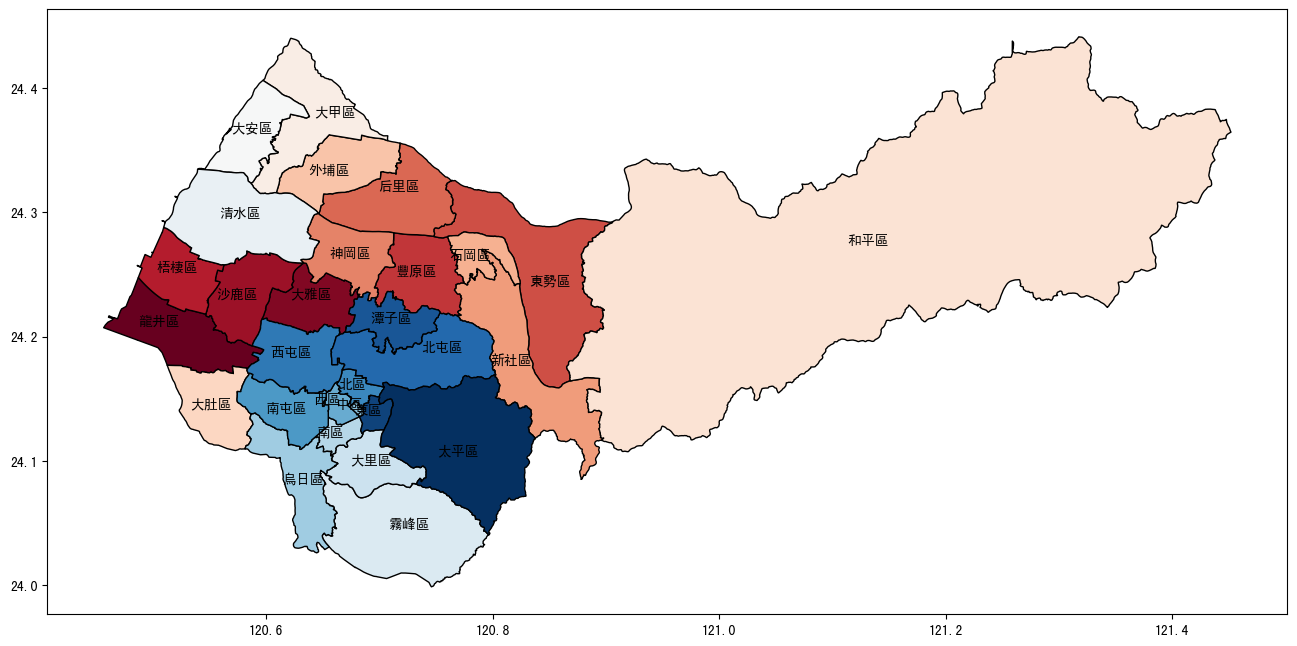

In [11]:
taichung_town_shp=town_shp[town_shp['COUNTYNAME']=='臺中市']

#重設 index => 解決 taichung_town_shp的index 與 enumerate() 不匹配問題
taichung_town_shp =taichung_town_shp.reset_index()

taichung_town_shp.plot(figsize=(16, 8),cmap='RdBu', edgecolor='k')
plt.rcParams['font.sans-serif'] = ['SimHei']

taichung_town_shp['coords'] = taichung_town_shp['geometry'].apply(lambda x: x.representative_point().coords[0])

# 地圖標註
for n, i in enumerate(taichung_town_shp['coords']):
    plt.text(i[0] - 0.02, i[1], taichung_town_shp['TOWNNAME'][n])  # 標註位置X，Y，標註内容


###### 檢查總比數與輸出結果落差多少 與原始資料落差30萬筆

In [12]:
Taichung = taichung_town_shp.merge(df_District_sum, left_on=('TOWNNAME'), right_on=('District'))
Taichung.head()

,index,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,coords,District,Sum
0,40,B25,66000250,臺中市,龍井區,Longjing District,B,66000,"POLYGON ((120.48718 24.24761, 120.48785 24.246...","(120.50666237795349, 24.209110149264006)",龍井區,47298
1,41,B18,66000180,臺中市,大雅區,Daya District,B,66000,"POLYGON ((120.63446 24.25916, 120.63500 24.259...","(120.64164637428009, 24.230364189156035)",大雅區,42567
2,42,B13,66000130,臺中市,沙鹿區,Shalu District,B,66000,"POLYGON ((120.58312 24.26898, 120.58377 24.268...","(120.57593199340009, 24.230824248140607)",沙鹿區,56185
3,43,B14,66000140,臺中市,梧棲區,Wuqi District,B,66000,"POLYGON ((120.51007 24.28782, 120.51055 24.287...","(120.52318585770482, 24.252929069171273)",梧棲區,24429
4,217,B09,66000090,臺中市,豐原區,Fengyuan District,B,66000,"POLYGON ((120.74825 24.28065, 120.74858 24.280...","(120.73458695378352, 24.25017617918735)",豐原區,88527


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\1427389918.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\1427389918.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


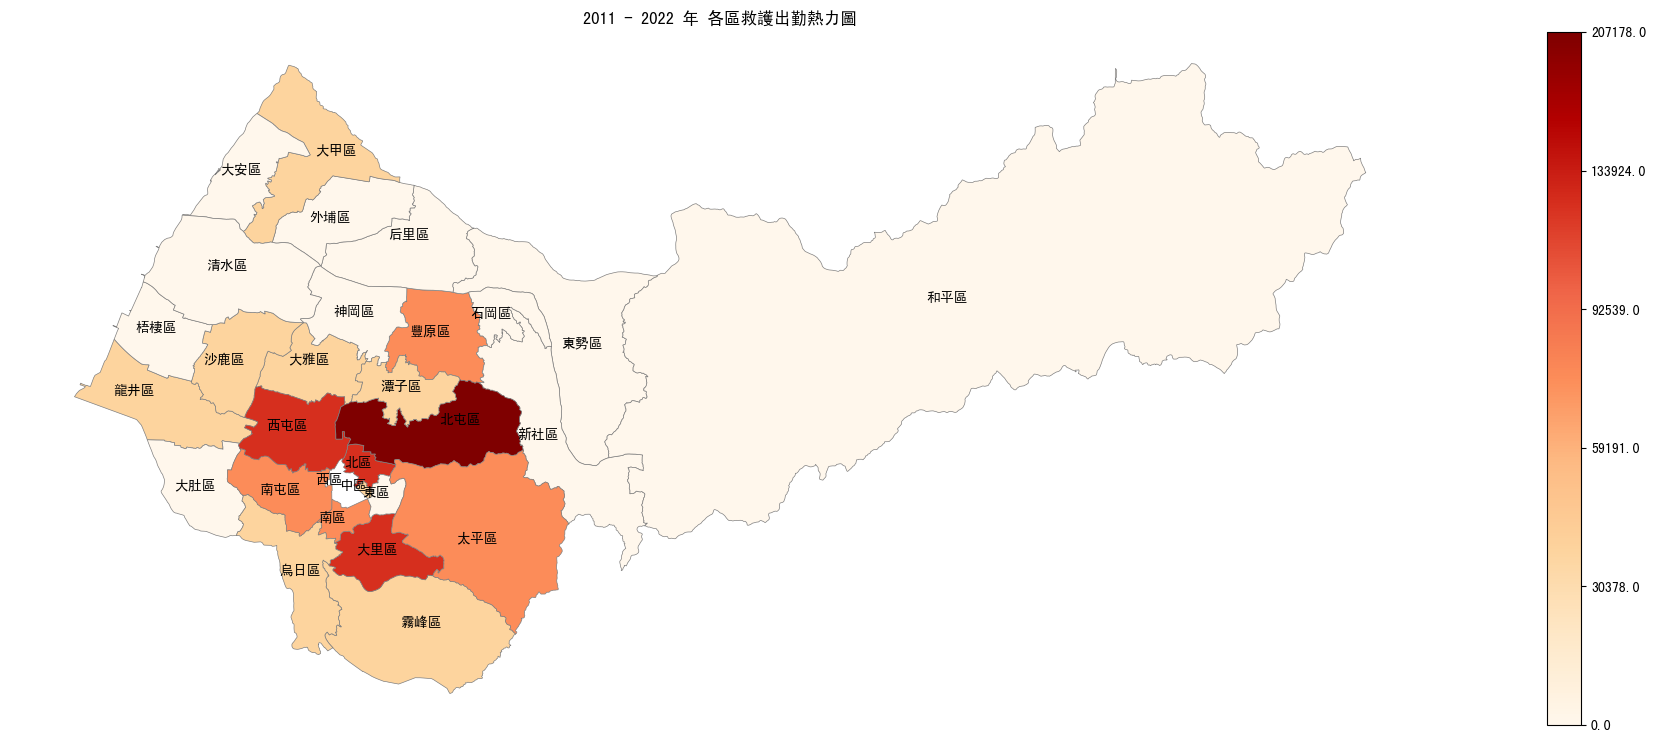

In [13]:
fig, ax = plt.subplots(1, figsize=(30, 9), dpi=100)

# Taichung.plot(figsize=(20, 8),column='Sum', cmap='OrRd', edgecolor='k')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('2011 - 2022 年 各區救護總出勤熱力圖')
taichung_town_shp['coords'] = taichung_town_shp['geometry'].apply(lambda x: x.representative_point().coords[0])

# 地圖
Taichung.plot(column='Sum', cmap='OrRd', scheme='FisherJenks', linewidth=0.5, edgecolor='0.5', ax=ax) # pip install mapclassify
ax.axis('off')

# 地圖標註
for n, i in enumerate(taichung_town_shp['coords']):
    plt.text(i[0] - 0.02, i[1], taichung_town_shp['TOWNNAME'][n])  # 標註位置X，Y，標註内容

# 範圍條圖
sm = plt.cm.ScalarMappable(cmap='OrRd')
cbar = fig.colorbar(sm)
bins = mapclassify.FisherJenks(Taichung['Sum'], 5).bins
bins = np.insert(bins, 0, 0)
_ = cbar.ax.set_yticklabels(bins)
    

#### 各年分隊出勤統計 (2011 - 2022 (多 - 少))

{'中區': 4424, '南區': 6608, '東區': 2692, '北區': 9975, '南屯區': 5341, '西屯區': 8591, '北屯區': 15801, '太平區': 7769, '大里區': 6517, '霧峰區': 3684, '烏日區': 3205, '大肚區': 1422, '龍井區': 3581, '梧棲區': 2160, '沙鹿區': 4338, '大雅區': 3596, '潭子區': 4106, '神岡區': 2792, '豐原區': 7519, '大甲區': 2763, '外埔區': 1315, '大安區': 727, '后里區': 2196, '石岡區': 1206, '新社區': 1145, '東勢區': 1965, '和平區': 911, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4244, '南區': 6539, '東區': 2733, '北區': 9846, '南屯區': 4944, '西屯區': 8325, '北屯區': 15547, '太平區': 7835, '大里區': 9420, '霧峰區': 3686, '烏日區': 3490, '大肚區': 1479, '龍井區': 3463, '梧棲區': 1931, '沙鹿區': 4425, '大雅區': 3422, '潭子區': 3717, '神岡區': 2794, '豐原區': 7220, '大甲區': 2737, '外埔區': 1256, '大安區': 783, '后里區': 2197, '石岡區': 1276, '新社區': 1125, '東勢區': 1888, '和平區': 833, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4405, '南區': 6789, '東區': 2728, '北區': 11079, '南屯區': 5039, '西屯區': 8876, '北屯區': 16494, '太平區': 7169, '大里區': 9344, '霧峰區': 3656, '烏日區': 3418, '大肚區': 1422, '龍井區': 3438, '梧棲區': 1909, '沙鹿區': 4382, '大雅區': 3647, '潭子區': 3174, '神岡區': 2607, '豐原區': 7137, '大甲區': 2774, '外埔區': 1238, '大安區': 708, '后里區': 2078, '石岡區': 1146, '新社區': 1125, '東勢區': 1815, '和平區': 806, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4630, '南區': 7196, '東區': 2957, '北區': 11462, '南屯區': 6066, '西屯區': 10007, '北屯區': 15919, '太平區': 7691, '大里區': 9473, '霧峰區': 3816, '烏日區': 3564, '大肚區': 1591, '龍井區': 3896, '梧棲區': 1986, '沙鹿區': 4888, '大雅區': 3912, '潭子區': 3365, '神岡區': 2536, '豐原區': 7387, '大甲區': 2835, '外埔區': 1343, '大安區': 778, '后里區': 2175, '石岡區': 1275, '新社區': 1222, '東勢區': 2011, '和平區': 911, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4666, '南區': 7028, '東區': 3026, '北區': 11007, '南屯區': 6617, '西屯區': 10999, '北屯區': 16243, '太平區': 7802, '大里區': 10046, '霧峰區': 4138, '烏日區': 3682, '大肚區': 1651, '龍井區': 4236, '梧棲區': 1960, '沙鹿區': 4723, '大雅區': 3874, '潭子區': 5466, '神岡區': 2551, '豐原區': 7051, '大甲區': 2984, '外埔區': 1215, '大安區': 880, '后里區': 2742, '石岡區': 1131, '新社區': 1119, '東勢區': 2055, '和平區': 896, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4653, '南區': 7205, '東區': 3178, '北區': 11169, '南屯區': 6890, '西屯區': 11496, '北屯區': 17909, '太平區': 7864, '大里區': 9851, '霧峰區': 3751, '烏日區': 3105, '大肚區': 1736, '龍井區': 4520, '梧棲區': 2010, '沙鹿區': 4906, '大雅區': 3793, '潭子區': 5514, '神岡區': 2529, '豐原區': 7414, '大甲區': 3090, '外埔區': 1321, '大安區': 874, '后里區': 2678, '石岡區': 1187, '新社區': 1119, '東勢區': 2290, '和平區': 808, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4701, '南區': 7502, '東區': 3221, '北區': 11031, '南屯區': 6990, '西屯區': 11774, '北屯區': 18204, '太平區': 8134, '大里區': 9910, '霧峰區': 3949, '烏日區': 3070, '大肚區': 1607, '龍井區': 3995, '梧棲區': 2013, '沙鹿區': 4694, '大雅區': 4058, '潭子區': 5586, '神岡區': 2444, '豐原區': 7327, '大甲區': 3065, '外埔區': 1158, '大安區': 775, '后里區': 2908, '石岡區': 1108, '新社區': 1039, '東勢區': 2164, '和平區': 834, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4582, '南區': 7387, '東區': 3302, '北區': 10867, '南屯區': 7328, '西屯區': 11912, '北屯區': 18878, '太平區': 7901, '大里區': 9804, '霧峰區': 3884, '烏日區': 3351, '大肚區': 1574, '龍井區': 4094, '梧棲區': 1974, '沙鹿區': 4571, '大雅區': 3633, '潭子區': 5767, '神岡區': 2511, '豐原區': 7129, '大甲區': 3088, '外埔區': 1240, '大安區': 807, '后里區': 2874, '石岡區': 1112, '新社區': 1120, '東勢區': 2155, '和平區': 852, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4741, '南區': 7418, '東區': 291, '北區': 11203, '南屯區': 7774, '西屯區': 12043, '北屯區': 19014, '太平區': 8094, '大里區': 9905, '霧峰區': 3969, '烏日區': 4449, '大肚區': 1550, '龍井區': 3986, '梧棲區': 2036, '沙鹿區': 4727, '大雅區': 3288, '潭子區': 5667, '神岡區': 2495, '豐原區': 7359, '大甲區': 3068, '外埔區': 1246, '大安區': 850, '后里區': 2803, '石岡區': 1113, '新社區': 1128, '東勢區': 2195, '和平區': 868, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4771, '南區': 7503, '東區': 0, '北區': 12038, '南屯區': 6668, '西屯區': 12343, '北屯區': 18321, '太平區': 7864, '大里區': 9988, '霧峰區': 4112, '烏日區': 4527, '大肚區': 1590, '龍井區': 4021, '梧棲區': 2046, '沙鹿區': 4849, '大雅區': 3313, '潭子區': 5583, '神岡區': 2445, '豐原區': 7688, '大甲區': 2711, '外埔區': 1536, '大安區': 917, '后里區': 2338, '石岡區': 1252, '新社區': 1053, '東勢區': 1925, '和平區': 873, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4989, '南區': 8047, '東區': 971, '北區': 13302, '南屯區': 6381, '西屯區': 14751, '北屯區': 19410, '太平區': 7703, '大里區': 10499, '霧峰區': 4603, '烏日區': 4959, '大肚區': 1582, '龍井區': 4430, '梧棲區': 2410, '沙鹿區': 5136, '大雅區': 3301, '潭子區': 6269, '神岡區': 2662, '豐原區': 8421, '大甲區': 3156, '外埔區': 1710, '大安區': 1096, '后里區': 2426, '石岡區': 1379, '新社區': 727, '東勢區': 2125, '和平區': 932, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


{'中區': 4176, '南區': 6725, '東區': 2763, '北區': 10643, '南屯區': 5484, '西屯區': 12807, '北屯區': 15438, '太平區': 6713, '大里區': 8369, '霧峰區': 3471, '烏日區': 3911, '大肚區': 1231, '龍井區': 3638, '梧棲區': 1994, '沙鹿區': 4546, '大雅區': 2730, '潭子區': 4977, '神岡區': 2012, '豐原區': 6875, '大甲區': 2665, '外埔區': 1341, '大安區': 891, '后里區': 2031, '石岡區': 1072, '新社區': 1119, '東勢區': 1696, '和平區': 863, '清水區': 0}


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6888\3819311033.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = cbar.ax.set_yticklabels(bins)


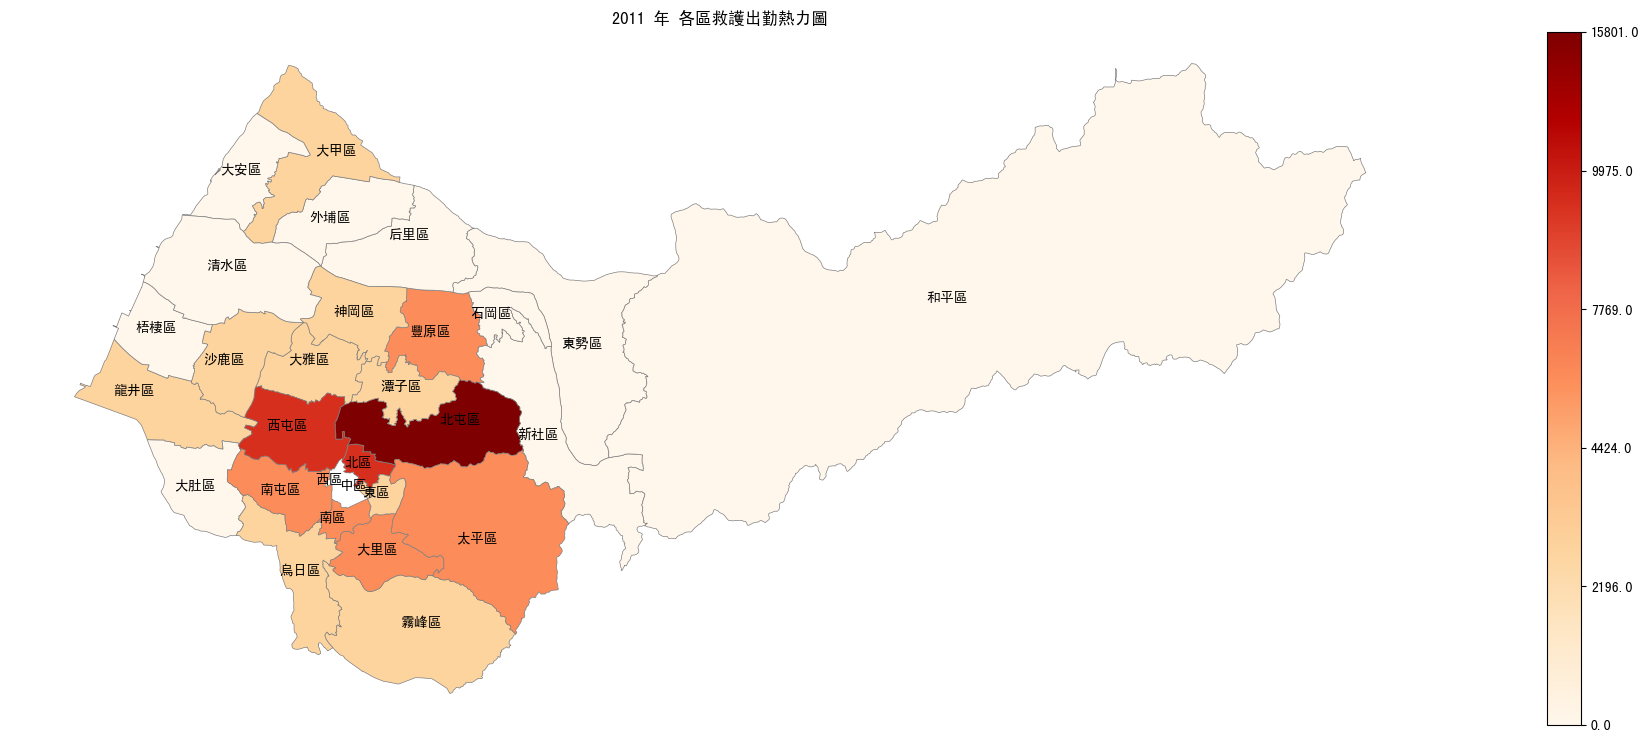

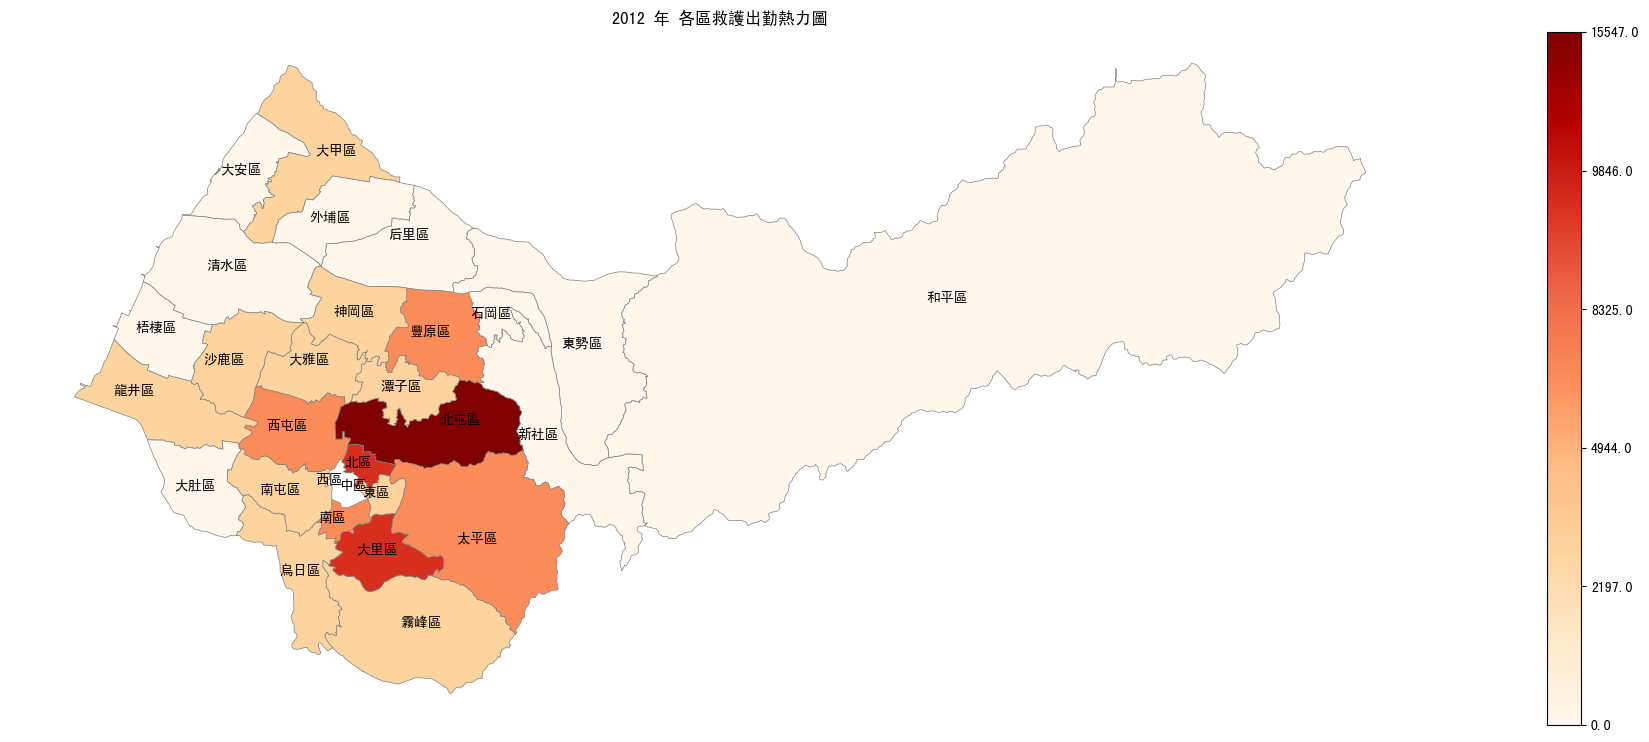

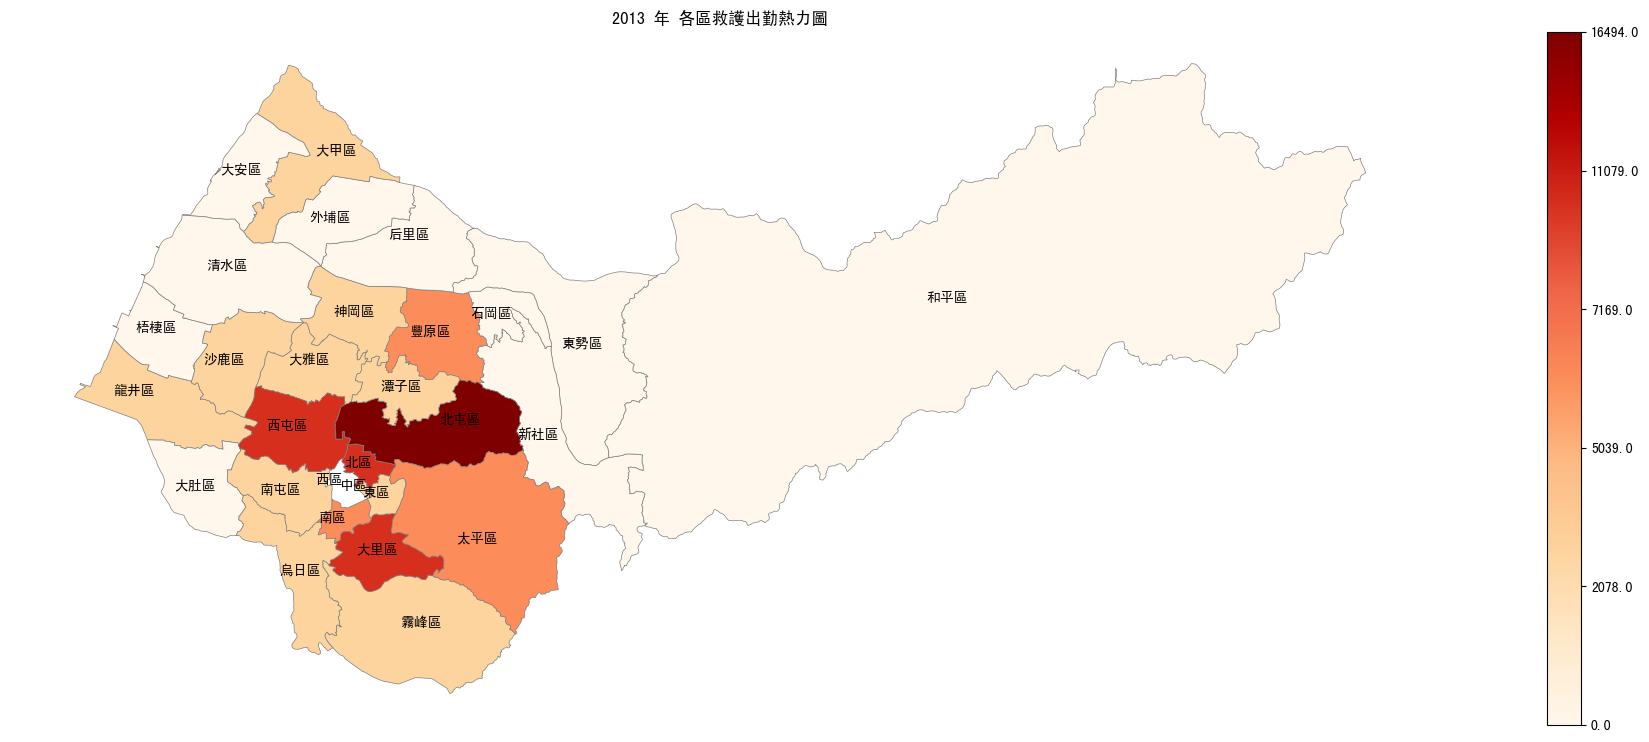

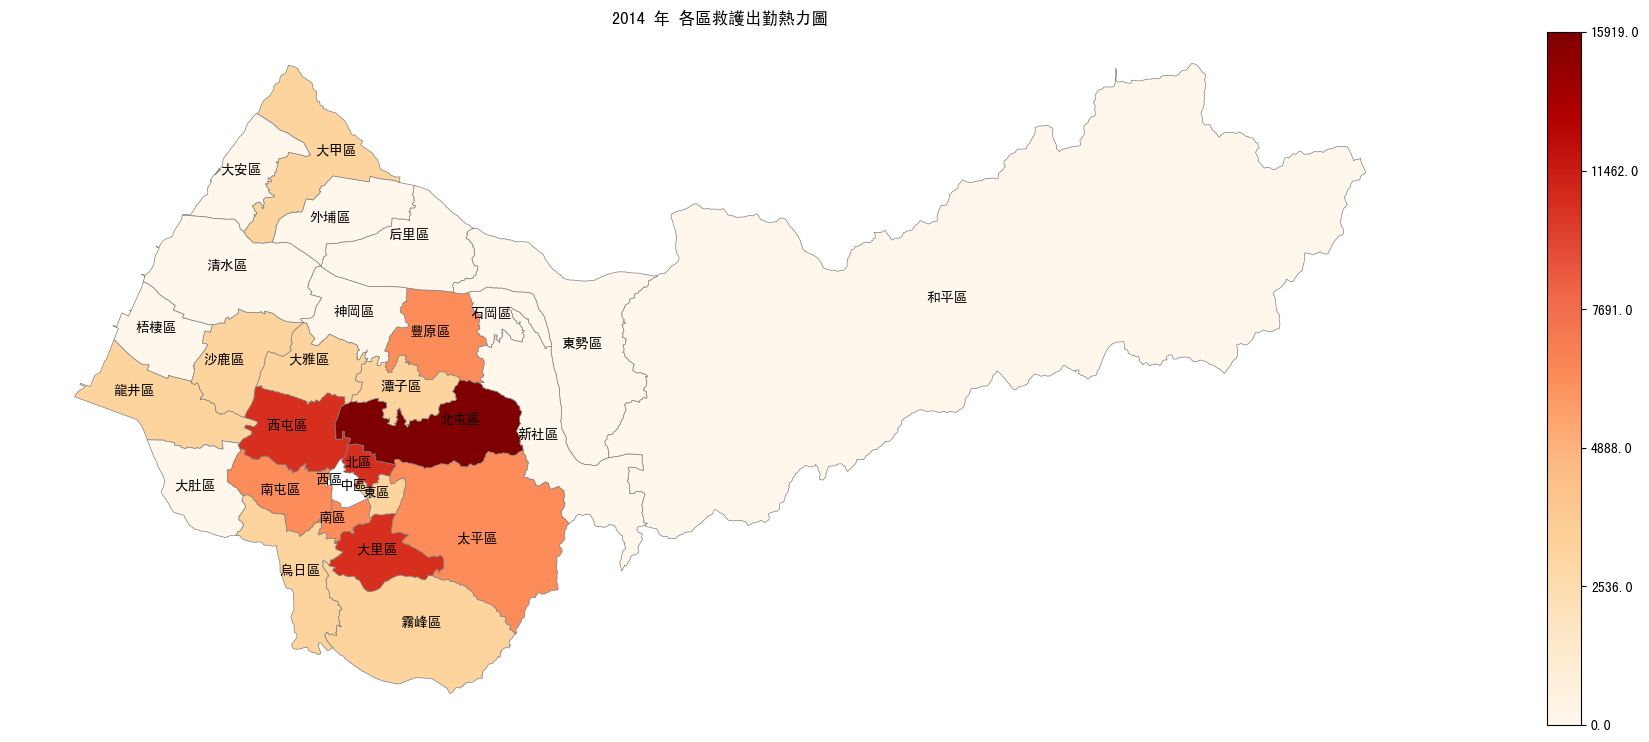

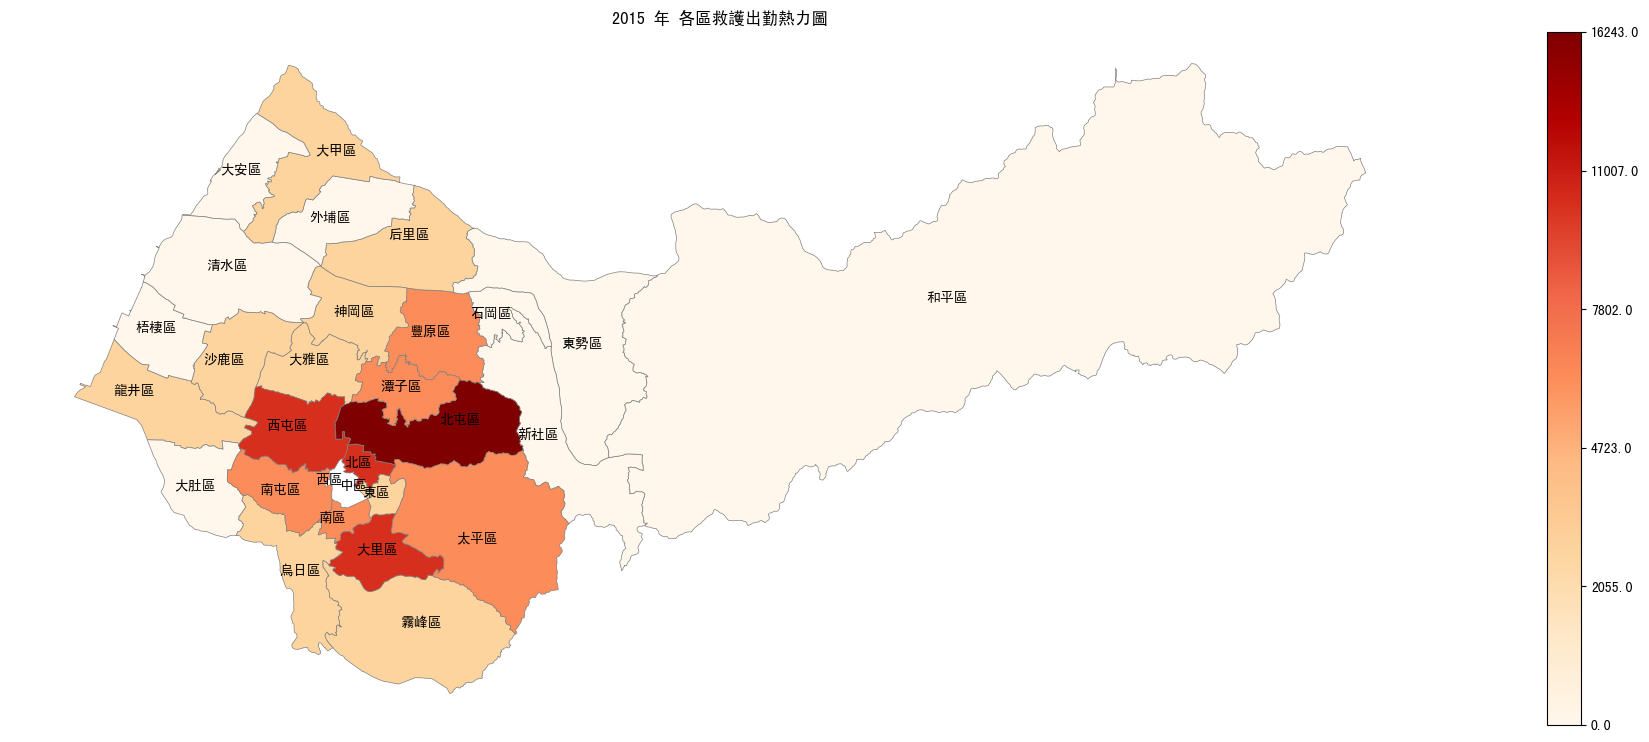

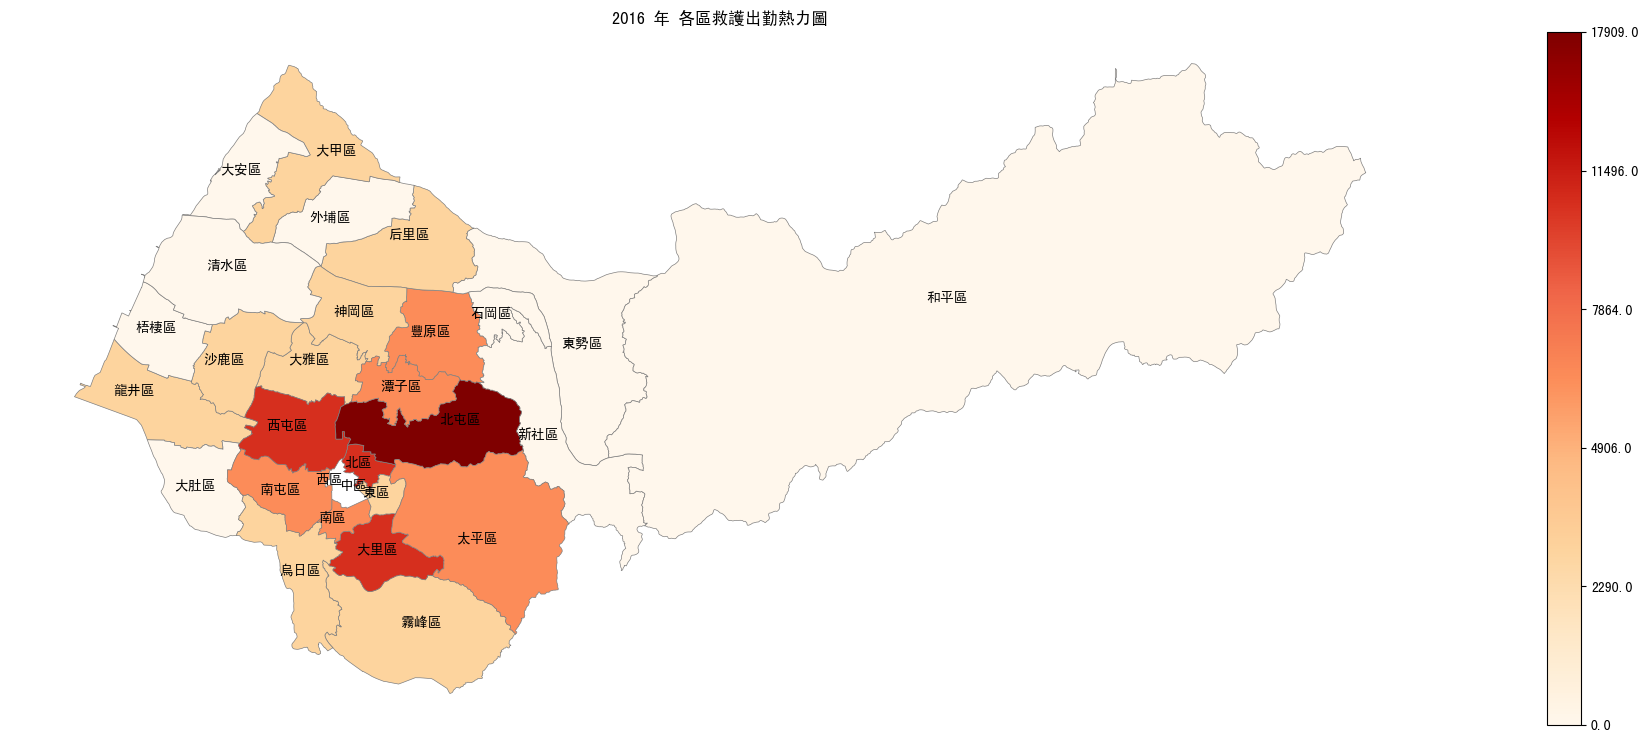

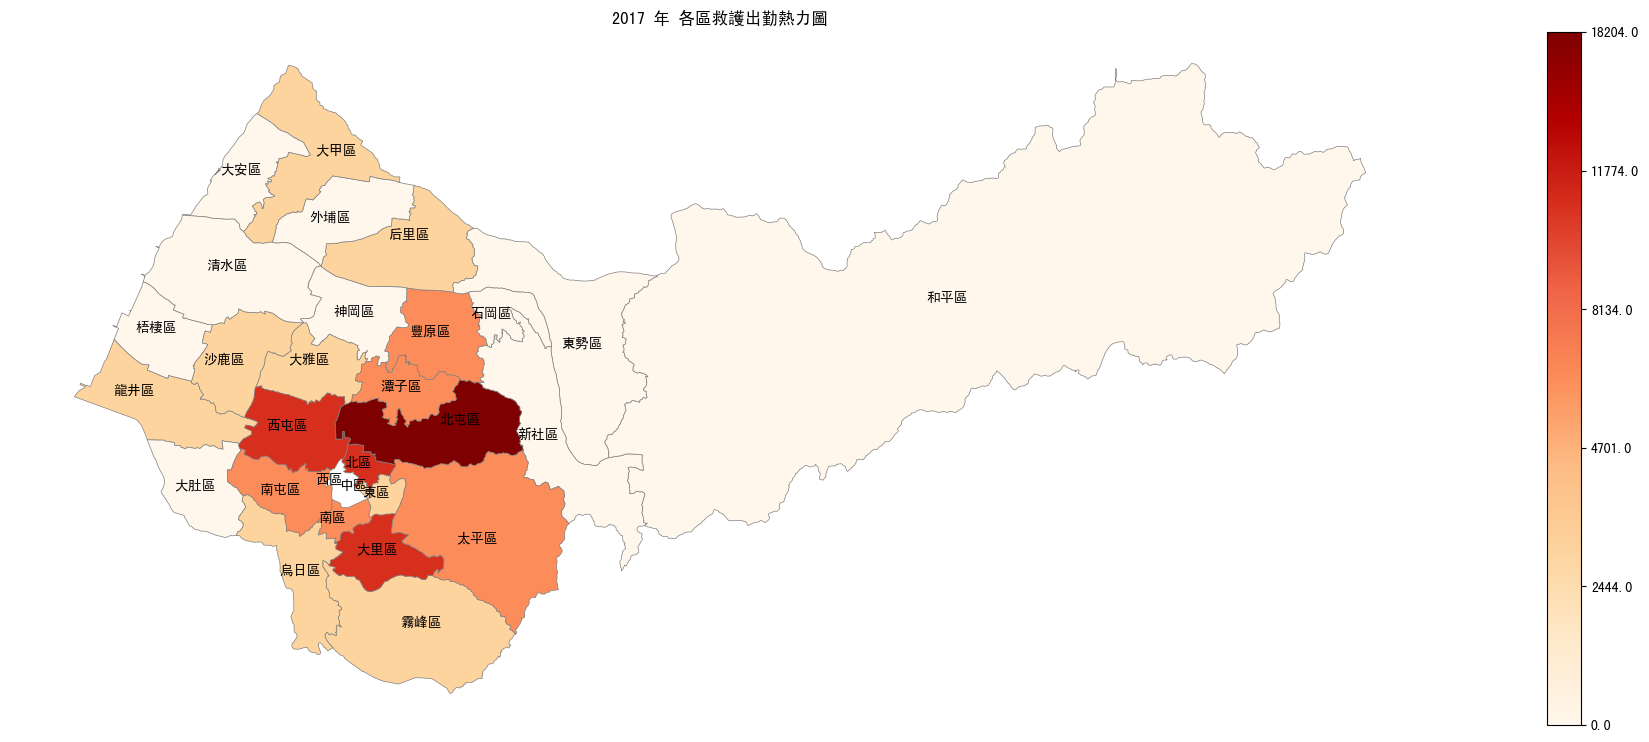

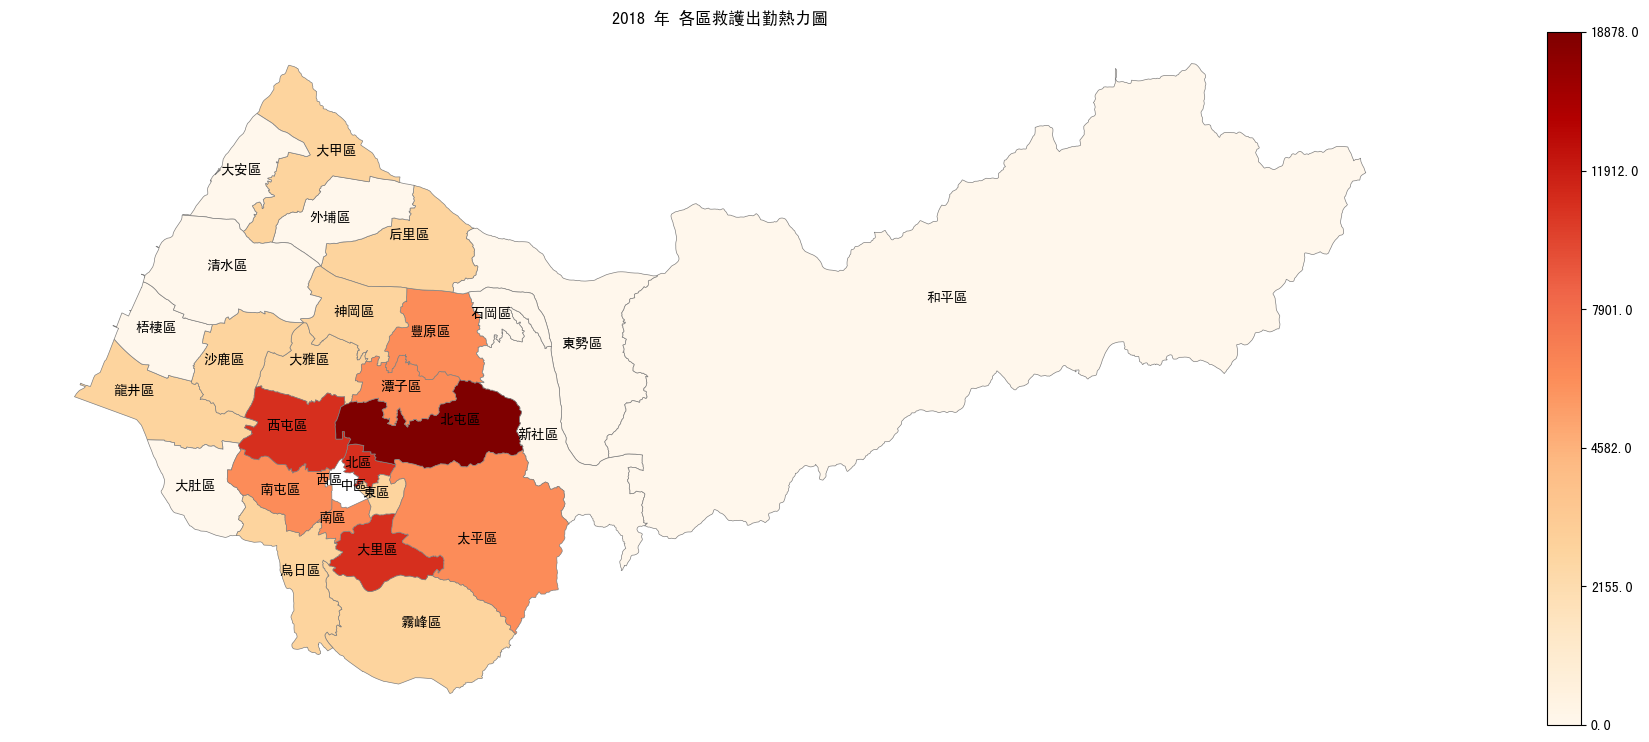

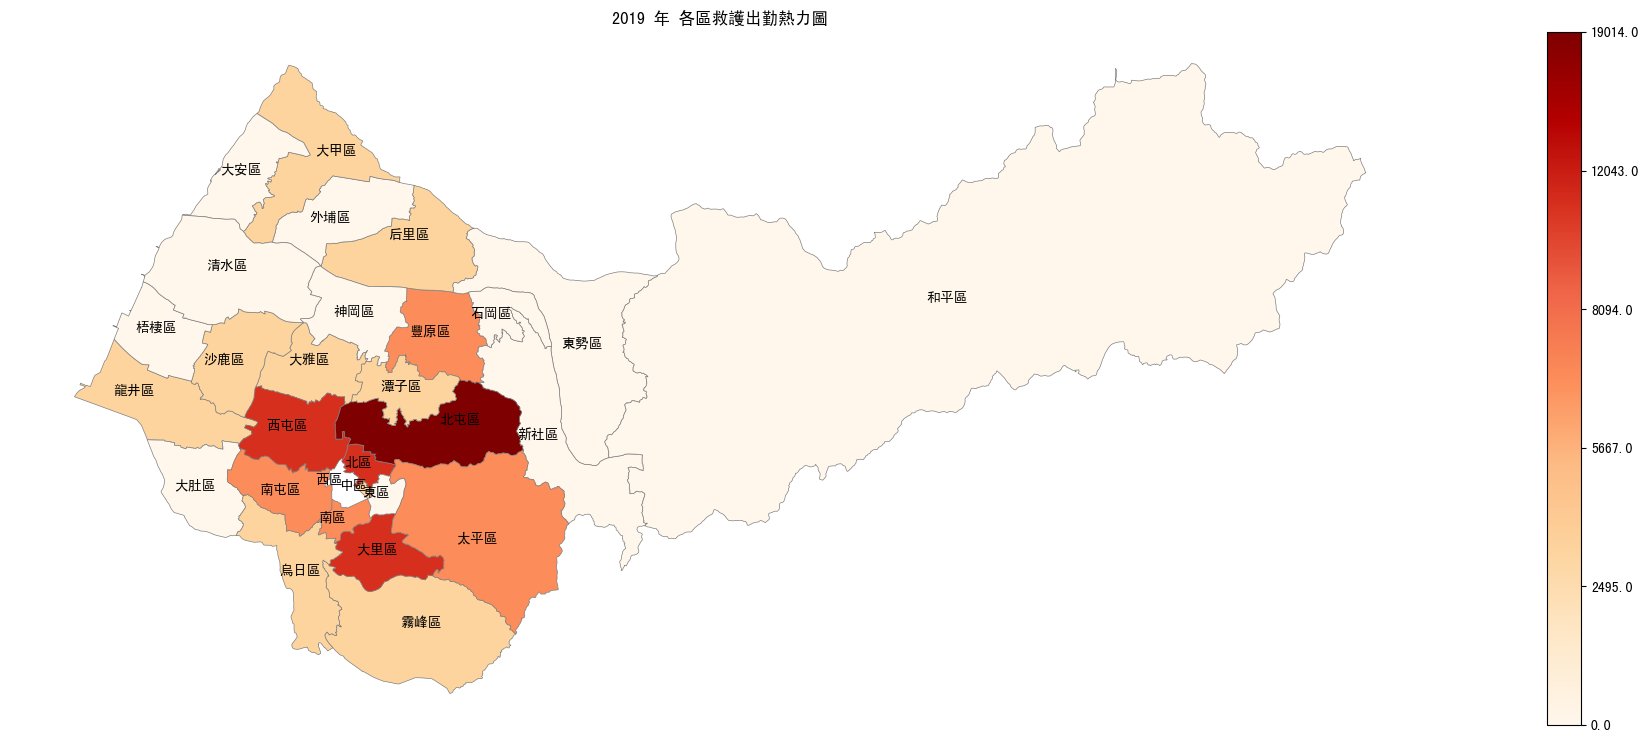

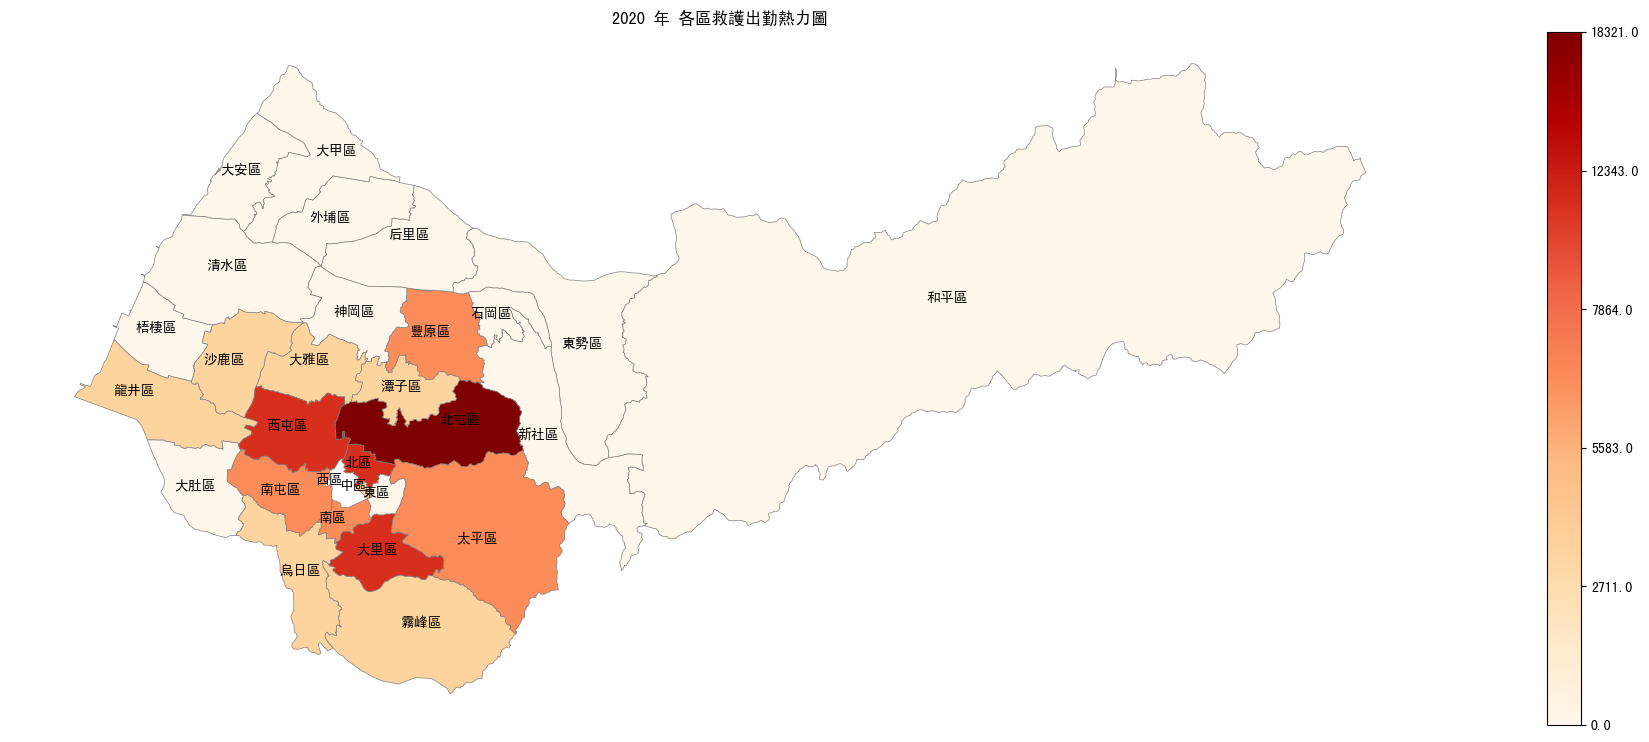

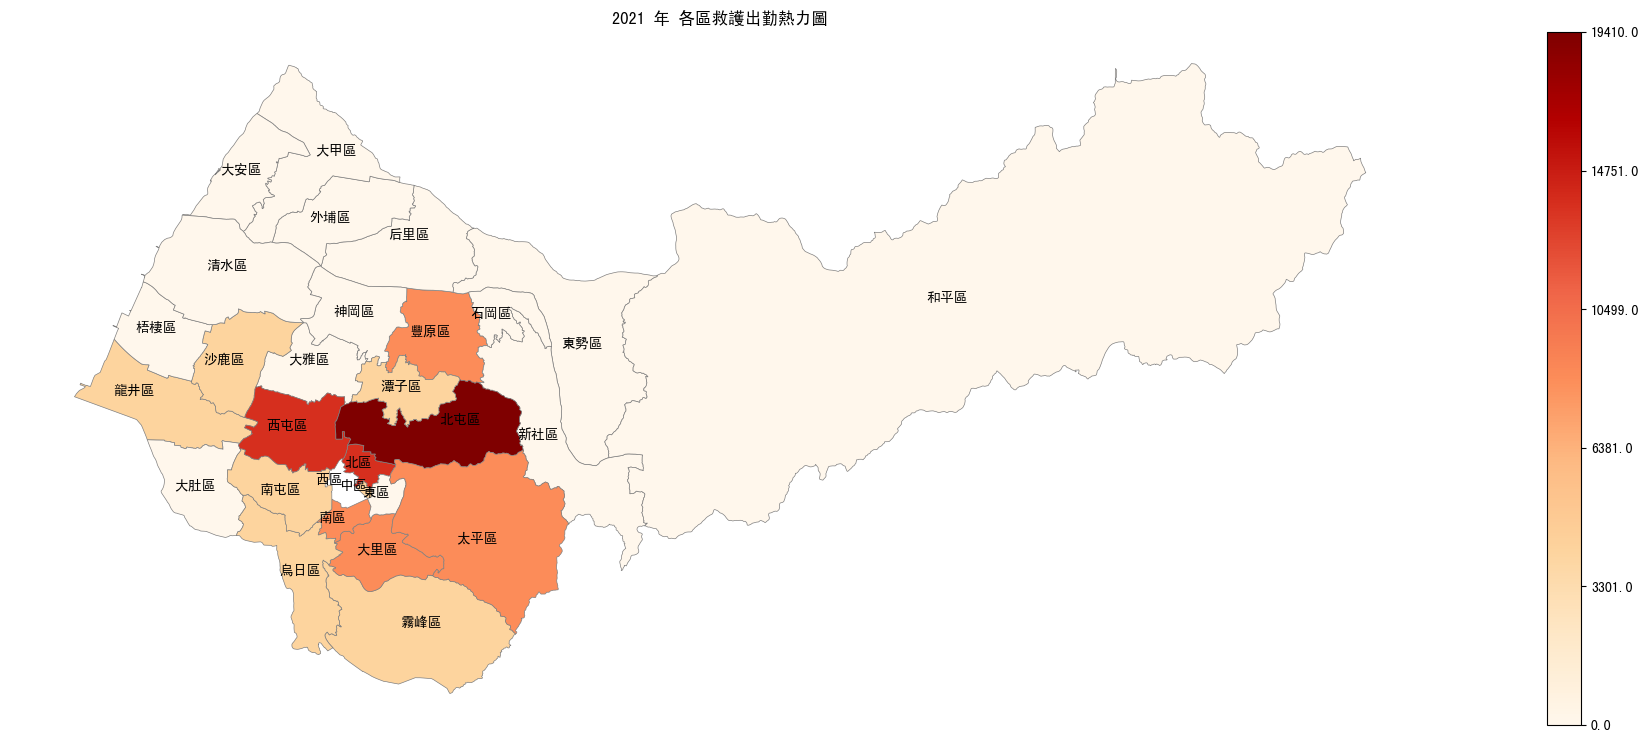

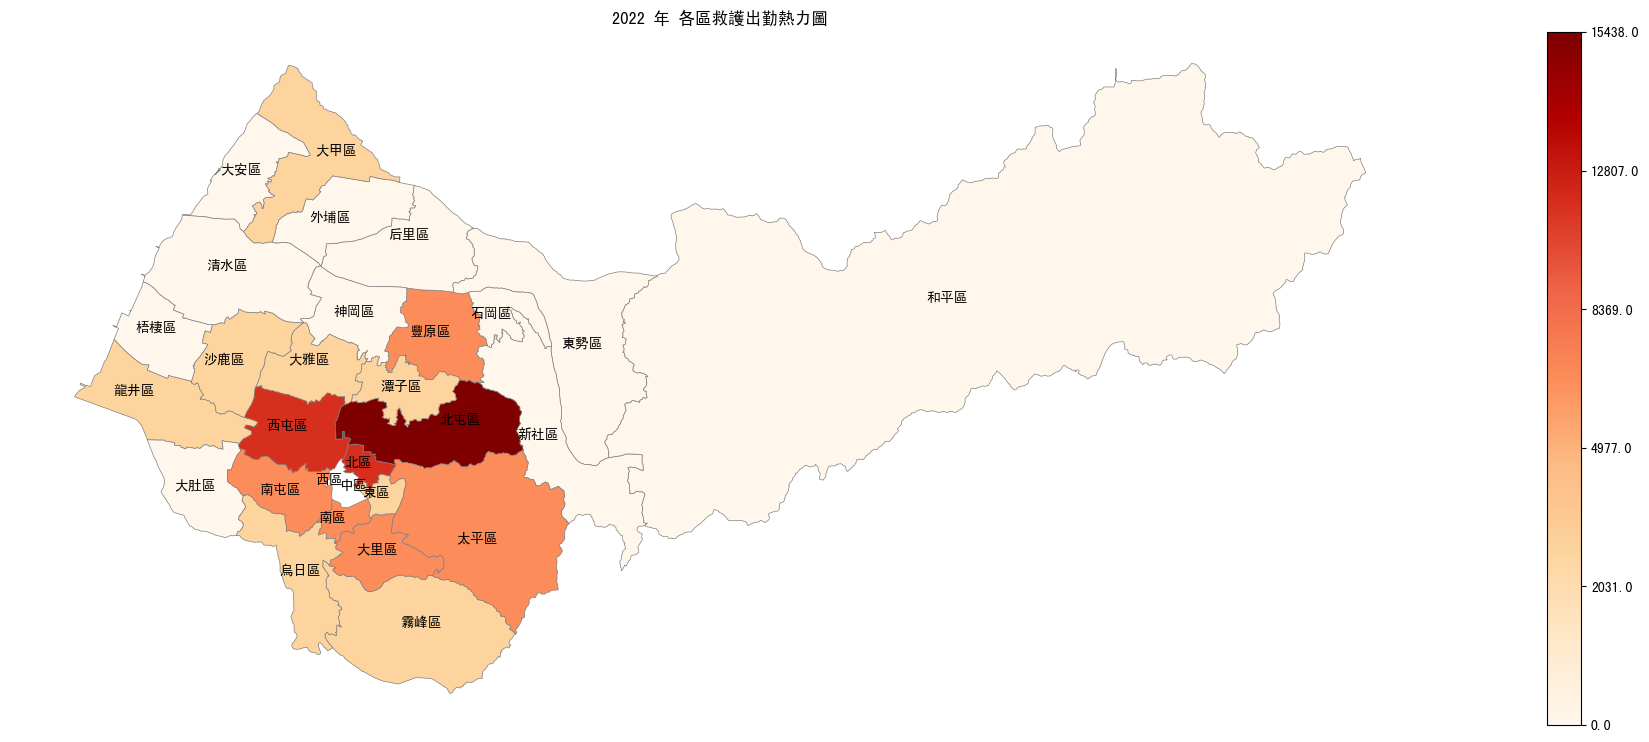

In [14]:
for year in years:
    District_sum_init = {k:0 for k in District_sum.keys()}
    mask  = address_df['year'] == int(year)
    class_Counter = function_api.count(address_df[mask], counter_colName)
    # print(class_Counter)

    team_data=address_df[mask][counter_colName].apply(lambda t: t[7:])
    for item in team_data:
        for item_dict in District_dict:
            if item in District_dict[item_dict]:
                District_sum_init[item_dict] += 1
            else:
                pass
    print(District_sum_init)
    
    df_District_sum = pd.DataFrame(list(District_sum_init.items()),columns=['District', 'Sum'], index=None)
    Taichung = taichung_town_shp.merge(df_District_sum, left_on=('TOWNNAME'), right_on=('District'))
    Taichung.head()
    fig, ax = plt.subplots(1, figsize=(30, 9), dpi=100)

    # Taichung.plot(figsize=(20, 8),column='Sum', cmap='OrRd', edgecolor='k')

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.title('{} 年 各區救護出勤熱力圖'.format(year))
    taichung_town_shp['coords'] = taichung_town_shp['geometry'].apply(lambda x: x.representative_point().coords[0])

    # 地圖
    Taichung.plot(column='Sum', cmap='OrRd', scheme='FisherJenks', linewidth=0.5, edgecolor='0.5', ax=ax) # pip install mapclassify
    ax.axis('off')

    # 地圖標註
    for n, i in enumerate(taichung_town_shp['coords']):
        plt.text(i[0] - 0.02, i[1], taichung_town_shp['TOWNNAME'][n])  # 標註位置X，Y，標註内容

    # 範圍條圖
    sm = plt.cm.ScalarMappable(cmap='OrRd')
    cbar = fig.colorbar(sm)
    bins = mapclassify.FisherJenks(Taichung['Sum'], 5).bins
    bins = np.insert(bins, 0, 0)
    _ = cbar.ax.set_yticklabels(bins)
    

#### 地址轉換經緯度

In [4]:
address = address_df['eSceneT01']
total = len(address)

with open('proxy_list.txt', 'r') as file:
    proxy_ips = file.read().splitlines()

for adr in address:
    adr = str(adr)
    total -= 1
    print(adr + '\t' + '剩餘筆數 :' + str(total))
    if adr == 'nan':
        address_df["longitude"] = None
        address_df["latitude"] = None
    else:
        # print(test.location(adr))
        latitude, longitude = function_api.location(proxy_ips, adr)
        address_df["longitude"] = longitude
        address_df["latitude"] = latitude   
        address_df.to_csv('../part2/merge.csv', index=False)
   

中市東區富榮街52號2樓-2	剩餘筆數 :1638245
使用的Proxy IP：103.106.219.141:8080
120.68705411498894 24.1457521843
尚武路70號	剩餘筆數 :1638244
使用的Proxy IP：103.106.219.141:8080


KeyboardInterrupt: 